In [1]:
# -*- coding: utf8 -*-
# This is a report using the data from IQAASL.
# IQAASL was a project funded by the Swiss Confederation
# It produces a summary of litter survey results for a defined region.
# These charts serve as the models for the development of plagespropres.ch
# The data is gathered by volunteers.
# Please remember all copyrights apply, please give credit when applicable
# The repo is maintained by the community effective January 01, 2022
# There is ample opportunity to contribute, learn and teach
# contact dev@hammerdirt.ch

# Dies ist ein Bericht, der die Daten von IQAASL verwendet.
# IQAASL war ein von der Schweizerischen Eidgenossenschaft finanziertes Projekt.
# Es erstellt eine Zusammenfassung der Ergebnisse der Littering-Umfrage für eine bestimmte Region.
# Diese Grafiken dienten als Vorlage für die Entwicklung von plagespropres.ch.
# Die Daten werden von Freiwilligen gesammelt.
# Bitte denken Sie daran, dass alle Copyrights gelten, bitte geben Sie den Namen an, wenn zutreffend.
# Das Repo wird ab dem 01. Januar 2022 von der Community gepflegt.
# Es gibt reichlich Gelegenheit, etwas beizutragen, zu lernen und zu lehren.
# Kontakt dev@hammerdirt.ch

# Il s"agit d"un rapport utilisant les données de IQAASL.
# IQAASL était un projet financé par la Confédération suisse.
# Il produit un résumé des résultats de l"enquête sur les déchets sauvages pour une région définie.
# Ces tableaux ont servi de modèles pour le développement de plagespropres.ch
# Les données sont recueillies par des bénévoles.
# N"oubliez pas que tous les droits d"auteur s"appliquent, veuillez indiquer le crédit lorsque cela est possible.
# Le dépôt est maintenu par la communauté à partir du 1er janvier 2022.
# Il y a de nombreuses possibilités de contribuer, d"apprendre et d"enseigner.
# contact dev@hammerdirt.ch

# sys, file and nav packages:
import datetime as dt

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import seaborn as sns

# home brew utitilties
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# set some parameters:
start_date = "2020-03-01"
end_date ="2021-09-31"
start_end = [start_date, end_date]
a_fail_rate = 50
reporting_unit = 100
unit_label = "p/100m"

a_color = "saddlebrown"

# colors for gradients
cmap2 = ck.cmap2
colors_palette = ck.colors_palette

# the search term for the river bassin
bassin_name = "les-alpes"

# the names for the survey area and the cumulative data
level_names = ["Les Alpes","All survey areas"]

# common aggregations
agg_pcs_quantity = {unit_label:"sum", "quantity":"sum"}
agg_pcs_median = {unit_label:"median", "quantity":"sum"}

# alpes data:
aldata = pd.read_csv("resources/checked_alpes_survey_data.csv")

# survey data lakes and rives
sdata = pd.read_csv("resources/checked_sdata_eos_2020_21.csv")

# location and object data
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")

# the dimensional data from each survey
dfDims = pd.read_csv("resources/alpes_dims.csv")

# remove the prefix from the beach names
alpb = dfBeaches[dfBeaches.river_bassin == "les-alpes"].copy()

# removing the prefix from the location names in the location data
alpb["slug"] = alpb.slug.apply(lambda x: x.replace("clean-up-tour-", ""))

# put that back together
dfBeaches = pd.concat([alpb, dfBeaches[dfBeaches.river_bassin != "les-alpes"]])

dfBeaches.set_index("slug", inplace=True)

# index the code data
dfCodes.set_index("code", inplace=True)

codes_to_change = [
    ["G74", "description", "Insulation foams"],
    ["G940", "description", "Foamed EVA for crafts and sports"],
    ["G96", "description", "Sanitary-pads/tampons, applicators"],
    ["G178", "description", "Metal bottle caps and lids"],
    ["G82", "description", "Expanded foams 2.5cm - 50cm"],
    ["G81", "description", "Expanded foams .5cm - 2.5cm"],
    ["G117", "description", "Expanded foams < 5mm"],
    ["G75", "description", "Plastic/foamed polystyrene 0 - 2.5cm"],
    ["G76", "description", "Plastic/foamed polystyrene 2.5cm - 50cm"],
    ["G24", "description", "Plastic lid rings"],
    ["G33", "description", "Lids for togo drinks plastic"],
    ["G3", "description", "Plastic bags, carier bags"],
    ["G204", "description", "Bricks, pipes not plastic"],
    ["G904", "description", "Plastic fireworks"],
    ["G211", "description", "Swabs, bandaging, medical"],
]

for x in codes_to_change:
    dfCodes = sut.shorten_the_value(x, dfCodes)

# make a map to the code descriptions
code_description_map = dfCodes.description

# make a map to the code descriptions
code_material_map = dfCodes.material

(lesalpes)=

# The Alps and the Jura

<a href="alpes_valaisannes_de.html" > Deutsch </a>

The Alps and the Jura (les Alpes) is a  survey area configured and managed by the Summit Foundation. The Summit Foundation has conducted [clean up events](https://www.summit-foundation.org/en/) throughout the Swiss Alps for many years. Included in the 2021 events were a series of litter-surveys conducted in parallel to the regularly scheduled events. Summit foundation had two questions with respect to IQAASL: 

1. How can data collection be integrated into the current business model?
2. How do surveys conducted on mountain trails compare to those on the waters edge?

The purpose of clean-up events is to remove as much litter as possible from a defined area, the limits on how much can be removed is related to the resources at hand. A litter survey is used to identify and maintain a count of the objects within a defined area. _In this sense a clean-up event is approaching the litter problem from the perspective of attenuation or mitigation and litter-surveys provide the data necessary to improve prevention_. 

## Survey methods

In total there were twenty litter-surveys conducted by Summit foundation. Initially two methods were selected:

1. Survey a section of trail for a defined distance and width
2. Survey the installations at the arrival/departure of the lift line

The survey procedure remains the same under both conditions:

1. A section of trail or surface area is measured
2. All visible pollutants are removed counted and classified.
3. The results and dimensions are recorded

The difference between the two methods is the way the limits of survey area are defined. When a trail is used the limits of the survey area are defined by the trail itself, not the surveyor. In the summertime the barriers and signs that mark out the areas for lift lines have all been removed, making it difficult for the surveyor to accurately determine the correct limits. 

## Survey area cumulative totals

*__Below:__ The Alpes and Jura survey area summer 2021. Marker diameter = the mean survey result in pieces of litter per 100 meters (p/100m).* 

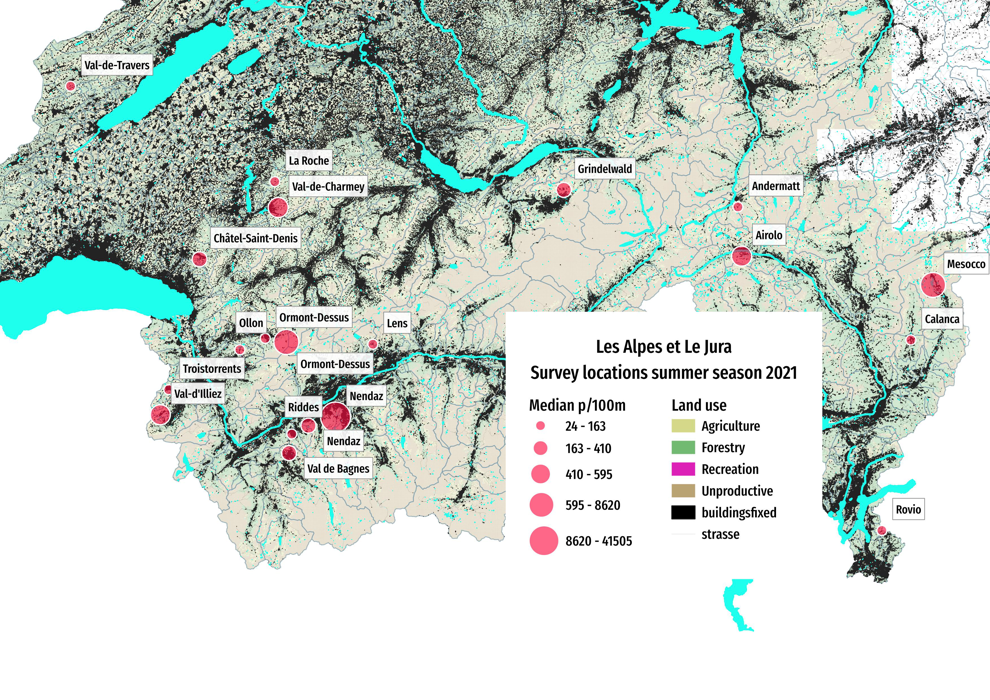

In [2]:
sut.display_image_ipython("resources/maps/survey_areas/alpesvalaisannes.jpeg")

In [3]:
# define the final survey data set here:
# combined the alps and the lakes and rivers data
predata = pd.concat([aldata, sdata])

# remove the prefix from the location names
predata["location"] = predata["location"].map(lambda x: sut.get_rid_of_ix(x, prefix="clean-up-tour-"))

# assign loc_date and make date stamp
predata["loc_date"] = list(zip(predata.location, predata["date"]))
predata["date"] = pd.to_datetime(predata["date"])

# remove prefixes from the alps location names
fd = predata[predata.river_bassin == "les-alpes"].copy()
sd = predata[predata.river_bassin != "les-alpes"]

# merge it back in with the rest
a_data = pd.concat([fd, sd])

# scale the streets to kilometers
a_data["streets"] = a_data.streets.astype("int")

# the totals for each survey and the locations in the feature data
fd_dt=fd.groupby(["loc_date", "date","month", "location"], as_index=False).agg(agg_pcs_quantity)

# survey totals
dt_all = a_data.groupby(["loc_date","location","river_bassin", "date"], as_index=False).agg(agg_pcs_quantity)

# the unique locations and samples
t = {"samples":fd.loc_date.nunique(),
     "locations":fd.location.unique(),
     "nlocations":fd.location.nunique(),
     "fdtotalq": fd.quantity.sum()
    }

# gather the municpalities and the population:
fd_pop_map = dfBeaches.loc[fd.location.unique()][["city","population"]].copy()
fd_pop_map.drop_duplicates(inplace=True)
fd_pop_map.set_index("city", drop=True, inplace=True)

t.update({"nmunis":len(fd_pop_map.index)})

# fancy print to jupyter:
obj_string = "{:,}".format(t["fdtotalq"])
surv_string = "{:,}".format(t["samples"])
pop_string = "{:,}".format(int(fd_pop_map.sum()[0]))

date_quantity_context = F"Between {start_date[:-3]} and {end_date[:-3]}, a total of {obj_string } objects  were removed and identified over the course of {surv_string} surveys."
geo_context = F"This includes {t['nlocations']} different locations in {t['nmunis']} different municipalities with a combined population of {pop_string}."
munis_joined = ", ".join(sorted(fd_pop_map.index))

# put that all together:
lake_string = F"""
{date_quantity_context} {geo_context }

\n\n >{munis_joined}"""

In [4]:
md(lake_string)


Between 2020-03 and 2021-09, a total of 7,776 objects  were removed and identified over the course of 20 surveys. This includes 20 different locations in 18 different municipalities with a combined population of 70,606.



 >Airolo, Andermatt, Calanca, Châtel-Saint-Denis, Grindelwald, La Roche, Lens, Mesocco, Nendaz, Ollon, Ormont-Dessus, Riddes, Rovio, Troistorrents, Val de Bagnes, Val-d'Illiez, Val-de-Charmey, Val-de-Travers

### Litter sample totals

*__Below:__ The aggregated results from the litter surveys. This does not include the event totals, see next section.*

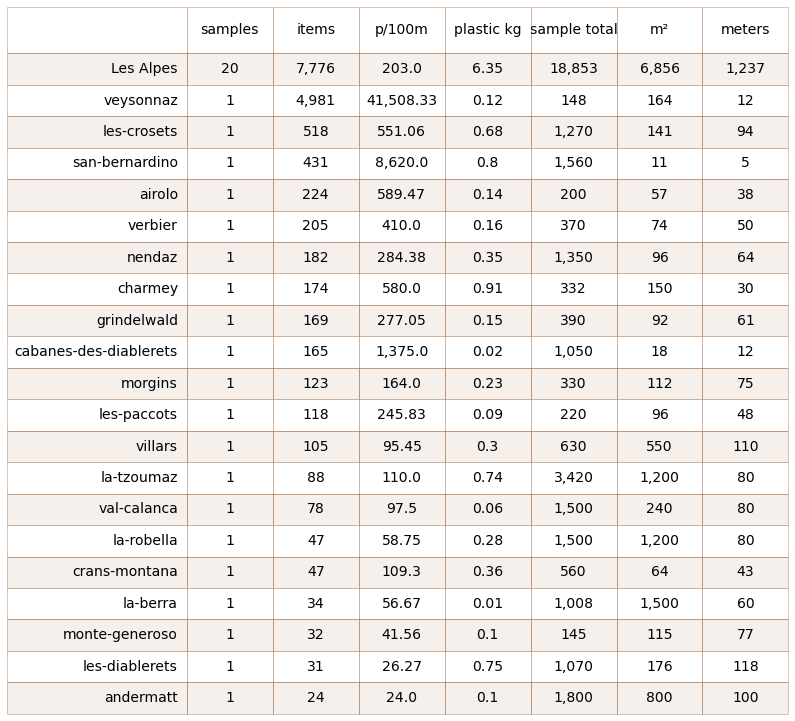

In [5]:
# gather the dimensional data for the time frame from dfDims
# match records to survey data
# the dimensional data, remove prefix and reassemble
fd_dims = dfDims[(dfDims.river_bassin == "les-alpes")&(dfDims.date >= start_date)&(dfDims.date <= end_date)].copy()
fd_dims["location"] = fd_dims.location.apply(lambda x: x.replace("clean-up-tour-", ""))
fd_dims["loc_date"] = list(zip(fd_dims.location, fd_dims.date))

# map the daily totals to the survey dimensions
q_map = fd_dt[["loc_date", "quantity"]].set_index("loc_date").quantity
fd_dims["quantity"] = fd_dims.loc_date.map(lambda x: q_map.loc[[x]].values[0])

# get the pieces per meter
fd_dims[unit_label] = ((fd_dims.quantity/fd_dims["length"])*reporting_unit).round(2)

# make a loc_date column 
fd_dims["loc_date"] = list(zip(fd_dims.location, fd_dims.date))

agg_for_table = {
    "quantity":"sum",
    unit_label:"mean",
    "total_w":"sum",
    "mac_plast_w":"sum",
    "mic_plas_w":"sum",
    "area":"sum",
    "length":"sum",
    "num_parts_other":"sum",
    "num_parts_staff":"sum",
    "time_minutes":"sum"
    
}

# the table of cumulative values
dims_table = fd_dims.groupby(["location"]).agg(agg_for_table )

# collect the number of samples from the survey total data:
for name in dims_table.index:
    dims_table.loc[name, "samples"] = fd_dt[fd_dt.location == name].loc_date.nunique()

# get the sum of all the samples
dims_table.loc[level_names[0]]= dims_table.sum(numeric_only=True, axis=0)

# take the median pcs_m of all the samples
dims_table.loc[level_names[0], unit_label] = fd_dt.groupby(["location"])[unit_label].sum().median()

# for display
dims_table.sort_values(by=["quantity"], ascending=False, inplace=True)

new_col_names={
    "quantity":"items",
    "total_w":"total kg", 
    unit_label:unit_label, 
    "mac_plast_w":"plastic kg", 
    "mic_plas_w":"sample total", 
    "area":"m²", 
    "length":"meters"
}


dims_table.rename(columns=new_col_names, inplace=True)

# order the columns
dims_table = dims_table[["samples", *dims_table.columns[:-1]]]

# format kilos
dims_table["plastic kg"] = dims_table["plastic kg"]/1000

# format for printing
dims_table.rename(columns={"num_parts_other":"participants", "num_parts_staff":"staff", "time_minutes":"time"}, inplace=True)

# numerical types and columns
tints = ["samples", "items", "total kg", "sample total", "m²", "participants", "staff", "time", "meters"]
twodec = [unit_label, "plastic kg" ]

# apply formatting
dims_table[tints] = dims_table[tints].astype("int")
dims_table[twodec] = dims_table[twodec].round(2)
dims_table["time"] = (dims_table["time"]/60).astype("int")

# apply string formatting:
commas = ["items","total kg", "sample total", "meters", "m²", unit_label]
dims_table[commas] = dims_table[commas].applymap(lambda x: F"{x:,}")

# table one
# data = dims_table.reset_index()
table_one = dims_table[["samples", "items",unit_label,"plastic kg","sample total", "m²", "meters"]].copy()
table_one.reset_index(inplace=True)

# make table
fig, ax = plt.subplots(figsize=(14, 13))
sut.hide_spines_ticks_grids(ax)
a_table = sut.make_a_table(ax,table_one.values , colLabels=table_one.columns, colWidths=[.23, *[.11]*7], bbox=[0, 0, 1, 1], bottom_row=True)
a_table.get_celld()[(0,0)].get_text().set_text(" ")
a_table.set_fontsize(14)
plt.show()

### Event totals

*__Below:__ The total amount of trash collected in kilograms, the number of participants and staff and the time to complete the survey.*

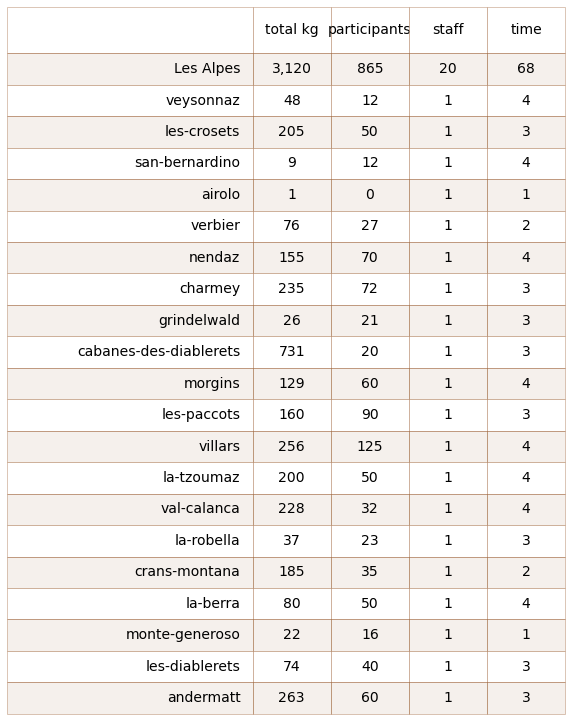

In [6]:
# table two event totals
table_two = dims_table[["total kg", "participants","staff", "time"]].copy()
table_two.reset_index(inplace=True, )

# make a table
fig, axs = plt.subplots(figsize=(10,13))
sut.hide_spines_ticks_grids(axs)

a_table = sut.make_a_table(axs, table_two.values, colLabels=table_two.columns, colWidths=[.44, *[.14]*4])
a_table.get_celld()[(0,0)].get_text().set_text(" ")
a_table.set_fontsize(14)

plt.show()
plt.tight_layout()
plt.close()

## Land use profile of the survey locations

The land use profile is the percent of total area attributed to each land use category within a 1500m radius of each survey location. 

* \% to buildings
* \% to agriculture
* \% to forestry
* \% to recreation

Streets are reported as the total number of kilometers of streets within the 1500m radius. Intersects are an ordinal ranking of the number of rivers/canals that intersect a lake within 1500m of the survey location. 

The ratio of the number of samples completed at the different land use profiles is an objective indicator of the overall environmental and economic conditions that the samples were taken in. The distribution of the land use profile of all the surveys from the IQAASL project is used as a reference value. 

See the section [*The land use profile*](luseprofile) for more details.

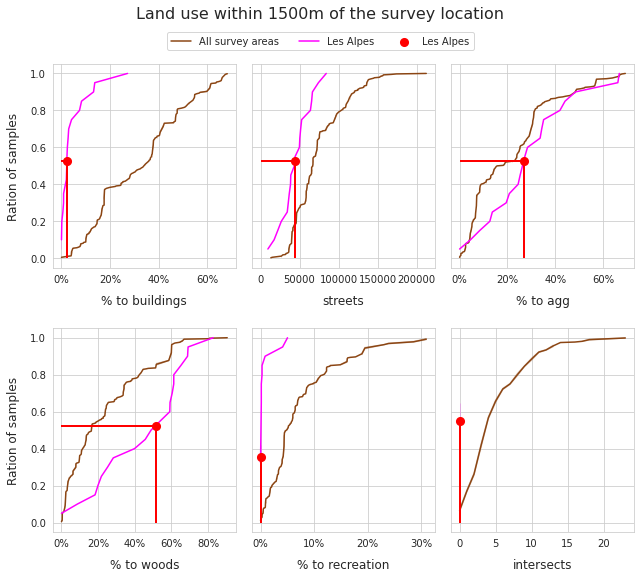

In [7]:
# explanatory variables:
luse_exp = ["% to buildings", "% to recreation", "% to agg", "% to woods", "streets", "intersects"]

# columns needed
use_these_cols = ["loc_date" ,"% to buildings", "% to trans", "% to recreation", "% to agg", "% to woods","population","location","streets", "intersects", "groupname","code"]

# the land use data from all other locations
datax = sd.groupby(use_these_cols[:-2], as_index=False).agg(agg_pcs_quantity)

# work off the copy
data = fd.groupby(use_these_cols[:-2], as_index=False).agg(agg_pcs_quantity)

sns.set_style("whitegrid")


fig, axs = plt.subplots(2, 3, figsize=(9,8), sharey="row")

for i, n in enumerate(luse_exp):
    r = i%2
    c = i%3
    ax=axs[r,c]   
    # get the empirical distribution of the independent variable
    all_surveys = ECDF(datax[n].values)
    les_alpes = ECDF(data[n].values)
        
    # plot that
    sns.lineplot(x=all_surveys.x, y=all_surveys.y, ax=ax, color=a_color, label=level_names[1])
    # plot that
    sns.lineplot(x=les_alpes.x, y=les_alpes.y, ax=ax, color="magenta", label=level_names[0])
    the_median = data[n].median()
    
    # get its position reference the surrounding survey area
    a = (stats.percentileofscore(les_alpes.x, the_median))/100
    
    # plot the median and drop horzontal and vertical lines
    ax.scatter([the_median], a, color="red",s=50, linewidth=2, zorder=100, label=level_names[0])
    ax.vlines(x=the_median, ymin=0, ymax=a, color="red", linewidth=2)
    ax.hlines(xmax=the_median, xmin=0, y=a, color="red", linewidth=2)
    
    # save the handels and labels but remove them from the ax    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    # format the % of total on the xaxis:
    if i <= 3:
        if c == 0:            
            ax.set_ylabel("Ration of samples", **ck.xlab_k)
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0, 0, "%"))        
    else:
        pass
    ax.set_xlabel(n, **ck.xlab_k)

plt.tight_layout()
plt.subplots_adjust(top=.9, hspace=.3)
plt.suptitle("Land use within 1500m of the survey location", ha="center", y=1, fontsize=16)
fig.legend(handles, labels, bbox_to_anchor=(.5,.94), loc="center", ncol=3)        
plt.show()

*__Above:__ The locations in the Alps survey area had a higher percentage of land attributed to forestry and aggriculture and a lower percentage of land attributed to buildings and recreation than the locations in IQAASL.* 

The aggregated results demonstrate the difference between the two survey methods. The three locations with the highest p/100m also have the shortest length. In the case of Cabanes-des-Diablerets the meter² is equal to the length, suggesting that a small area was surveyed around a structure or building. Veysonnaz is located at the end of a ski lift line. 

The difference in methods produces markedly different results. Furthermore, these two locations were selected specifically for inventory because of the surveyor’s previous experiences. Due to the differences in dimensions and methods the survey results from Veysonnaz, San-Beranardino and Cabanes-des-Diablerets are not considered in the proceeding analysis. 

## Distribution of survey results

In [8]:
# figure caption
chart_notes = F"""
*__Left:__ All samples lakes/rivers and walking trails, {start_date[:7]} through {end_date[:7]}, n=403. __Right:__ Distribution of survey results, outliers removed.*  
"""
md(chart_notes )


*__Left:__ All samples lakes/rivers and walking trails, 2020-03 through 2021-09, n=403. __Right:__ Distribution of survey results, outliers removed.*  


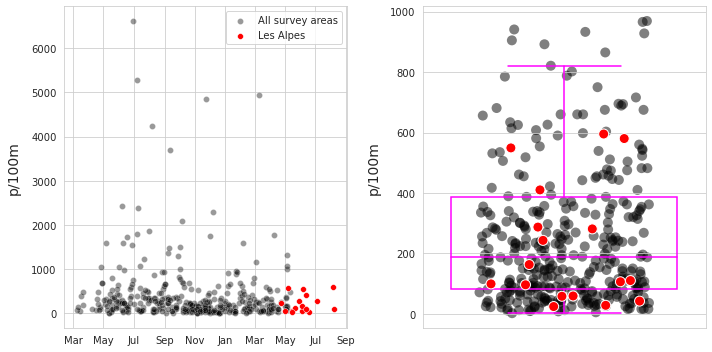

In [9]:
remove = ["veysonnaz", "cabanes-des-diablerets", "san-bernardino"]

# the feature data without the three locations
wt_data = fd[~fd.location.isin(remove)].copy()

# the daily totals of like samples
wt_dt =fd_dt[~fd_dt.location.isin(remove)].copy()

# all the data without the three locations
a_data = a_data[~a_data.location.isin(remove)]

# the 17 like sample locations
nvsn = wt_dt.location.unique()

# make a df of survey totals with date as index
# the daily survey totals of all the data for the survey period
a_dt = a_data.groupby(["loc_date", "date","location"], as_index=False).agg(agg_pcs_quantity)

# only the surveys from all other survey areas
dts_date = a_dt[(~a_dt.location.isin([*nvsn, *remove]))].copy()
# months locator, can be confusing
# https://matplotlib.org/stable/api/dates_api.html
months_fmt = mdates.DateFormatter("%b")

fig, axs = plt.subplots(1,2, figsize=(10,5))

ax = axs[0]

# there is a big value in here, that should be seen.
sns.scatterplot(data=dts_date, x="date", y=unit_label, color="black", alpha=0.4, label=level_names[1], ax=ax)
sns.scatterplot(data=wt_dt, x="date", y=unit_label, color="red", s=34, ec="white",label=level_names[0], ax=ax)

ax.set_xlabel("")
ax.set_ylabel(unit_label, **ck.xlab_k14)

# ax.tick_params(axis="x", which="both", bottom=False )
ax.xaxis.set_major_formatter(months_fmt)

axtwo = axs[1]

box_props = {
    "boxprops":{"facecolor":"none", "edgecolor":"magenta"},
    "medianprops":{"color":"magenta"},
    "whiskerprops":{"color":"magenta"},
    "capprops":{"color":"magenta"}
}
sns.boxplot(data=dts_date, y=unit_label, color="black",  ax=axtwo, showfliers=False, **box_props, zorder=1)
sns.stripplot(data=dts_date[dts_date[unit_label] <= 1000], s=10, y=unit_label, color="black", ax=axtwo, alpha=0.5, jitter=0.3, zorder=0)
sns.stripplot(data=wt_dt, y=unit_label, color="red", s=10, ec="white",linewidth=1, ax=axtwo, jitter=0.3, zorder=2)

axtwo.set_xlabel("")
axtwo.set_ylabel(unit_label, **ck.xlab_k14)

axtwo.tick_params(which="both", axis="x", bottom=False)

plt.tight_layout()
plt.show()
plt.close()

### Summary data and material types

*__Left:__ Walking trails summary of survey totals. __Right:__ Walking trails material type and percent of total.*

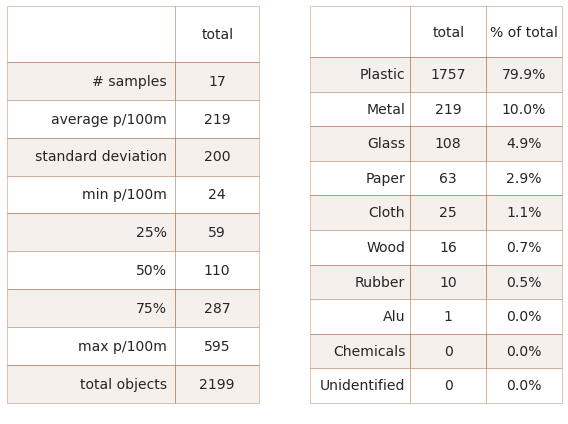

In [10]:
# get the basic statistics from pd.describe
cs = wt_dt[unit_label].describe().round(2)

# add project totals
cs["total objects"] = fd[~fd.location.isin(remove)].quantity.sum()

# change the names
csx = sut.change_series_index_labels(cs, sut.create_summary_table_index(unit_label, lang="EN"))

# format the text
combined_summary = sut.fmt_combined_summary(csx, nf=[])

# the material totals
code_totals = sut.the_aggregated_object_values(wt_data, agg=agg_pcs_median, description_map=code_description_map, material_map=code_material_map)    
code_totals.sort_values(by="quantity", ascending=False)

fd_mat_totals = sut.the_ratio_object_to_total(code_totals)

fd_mat_totals = sut.fmt_pct_of_total(fd_mat_totals)
fd_mat_totals = sut.make_string_format(fd_mat_totals)

fd_mat_t = fd_mat_totals[["material", "quantity", "% of total"]].values

# make tables
fig, axs = plt.subplots(1,2, figsize=(8,6))

# summary table
# names for the table columns
a_col = [level_names[0], "total"]

axone = axs[0]
sut.hide_spines_ticks_grids(axone)

table_two = sut.make_a_table(axone, combined_summary,  colLabels=a_col, colWidths=[.5,.25,.25],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_two.get_celld()[(0,0)].get_text().set_text(" ")
table_two.set_fontsize(14)

# material table
axtwo = axs[1]
axtwo.set_xlabel(" ")
sut.hide_spines_ticks_grids(axtwo)

# column names for display
cols_to_use = {"material":"material","quantity":"total", "% of total":"% of total"}

table_three = sut.make_a_table(axtwo, fd_mat_t,  colLabels=list(cols_to_use.values()), colWidths=[.4, .3,.3],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_three.get_celld()[(0,0)].get_text().set_text(" ")
table_three.set_fontsize(14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

### The most common objects

The most common objects are __the ten most abundant by quantity found__ AND/OR __any object that was identified in at least 50% of all the surveys.__ 

In [11]:
# code totals for les Alps not including veysonnaz
code_totals.rename(columns={"groupname":"utility"}, inplace=True)

# objects with a fail rate of > 50% in the survey area
most_common = code_totals[code_totals["fail rate"] >= 50].sort_values(by="quantity", ascending=False)

# the top ten by quantity
most_abundant = code_totals.sort_values(by="quantity", ascending=False)[:10]

# merge with most_common and drop duplicates
m_common = pd.concat([most_abundant, most_common]).drop_duplicates()

# get percent of total
m_common_percent_of_total = m_common.quantity.sum()/code_totals.quantity.sum()

# format values for table
m_common["item"] = m_common.index.map(lambda x: code_description_map.loc[x])
m_common["% of total"] = m_common["% of total"].map(lambda x: F"{x}%")
m_common["quantity"] = m_common.quantity.map(lambda x: "{:,}".format(x))
m_common["fail rate"] = m_common["fail rate"].map(lambda x: F"{x}%")
m_common[unit_label] = m_common[unit_label].map(lambda x: F"{np.ceil(x)}")

# final table wt_data
cols_to_use = {"item":"item","quantity":"quantity", "% of total":"% of total", "fail rate":"fail rate", unit_label:unit_label}
walking_trails = m_common[cols_to_use.keys()].values

# figure caption
rb_string = F"""
*__Below:__ Walking trails most common objects: fail rate >/= {a_fail_rate}%  and/or top ten by quantity. 
Combined, the ten most abundant objects represent {int(m_common_percent_of_total*100)}% of all objects found, {unit_label}: median survey value.*
"""
md(rb_string)


*__Below:__ Walking trails most common objects: fail rate >/= 50%  and/or top ten by quantity. 
Combined, the ten most abundant objects represent 69% of all objects found, p/100m: median survey value.*


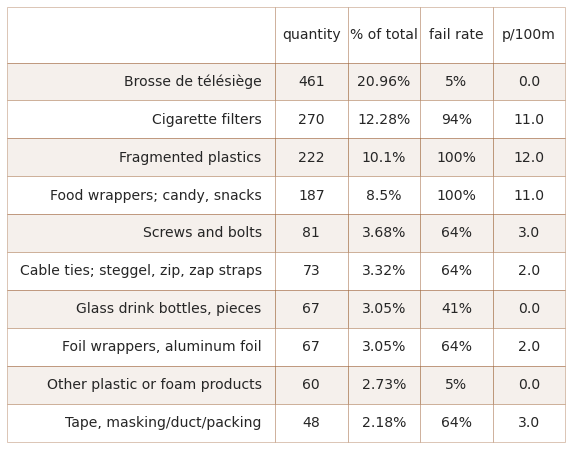

In [12]:
fig, axs = plt.subplots(figsize=(10,len(m_common)*.8))

sut.hide_spines_ticks_grids(axs)

table_three = sut.make_a_table(axs, walking_trails,  colLabels=list(cols_to_use.values()), colWidths=[.48, .13,.13,.13, .13],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_three.get_celld()[(0,0)].get_text().set_text(" ")
table_three.set_fontsize(14)

plt.show()
plt.tight_layout()
plt.close()

### Most common objects results by survey location

In [13]:
rb_string = F"""
*__Below:__ Walking trails most common objects: median {unit_label}.*
"""
md(rb_string)


*__Below:__ Walking trails most common objects: median p/100m.*


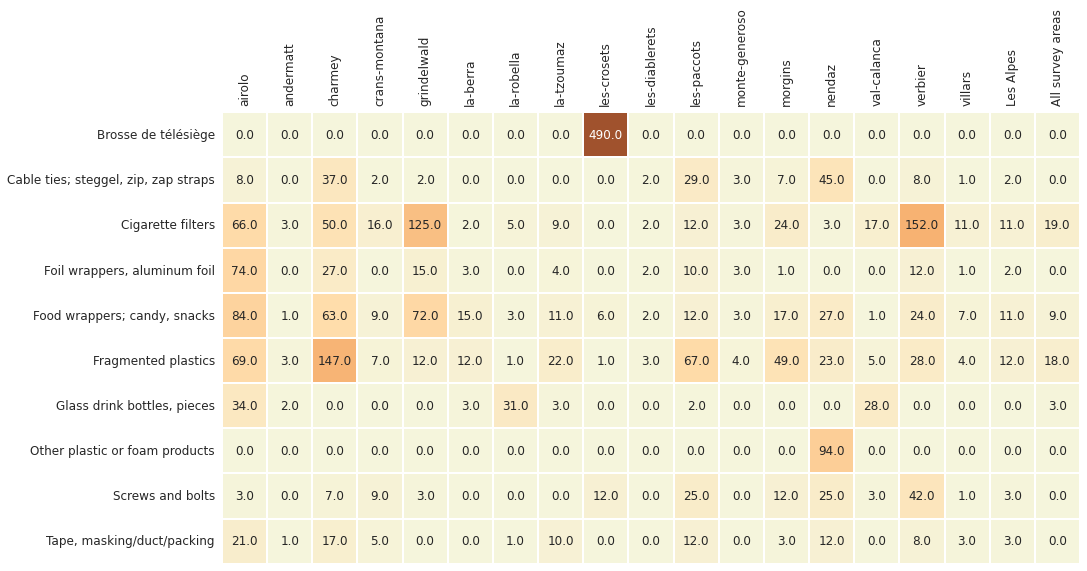

In [14]:
# aggregated survey totals for the most common codes for all the water features 
m_common_st = wt_data[wt_data.code.isin(m_common.index)].groupby(["location", "loc_date","code"], as_index=False).agg(agg_pcs_quantity)
m_common_ft = m_common_st.groupby(["location", "code"], as_index=False)[unit_label].median()

# map the desctiption to the code
m_common_ft["item"] = m_common_ft.code.map(lambda x: code_description_map.loc[x])

# pivot that
m_c_p = m_common_ft[["item", unit_label, "location"]].pivot(columns="location", index="item")

# quash the hierarchal column index
m_c_p.columns = m_c_p.columns.get_level_values(1)

# the aggregated totals for the survey area
m_c_p[level_names[0]]= sut.aggregate_to_code(wt_data[wt_data.code.isin(m_common.index)], code_description_map,name=level_names[0])

# a_s_a = a_data[(a_data["date"] >= start_date)&(a_data["date"] <= end_date)&(a_data.code.isin(m_common.index))].groupby(["water_name_slug", "loc_date", "code"], as_index=False).agg(agg_pcs_quantity)
m_c_p[level_names[1]] = sut.aggregate_to_code(a_data[a_data.code.isin(m_common.index)], code_description_map,name=level_names[1])

# chart that
fig, ax  = plt.subplots(figsize=(len(m_c_p.columns)*.8,len(m_c_p)*.9))

axone = ax
sns.heatmap(m_c_p, ax=axone,  annot=True,vmax=300, annot_kws={"fontsize":12}, cmap=cmap2, fmt=".1f", square=True, cbar=False, linewidth=.1, linecolor="white")

axone.set_xlabel("")
axone.set_ylabel("")
axone.tick_params(labelsize=12, which="both", axis="both", labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.close()

*__Below:__ Brosse de télésiège/ski-lift brushes, used to remove ice and snow from ski lifts can get separated from the installation, producing thousands of heavy gage plastic filaments.*

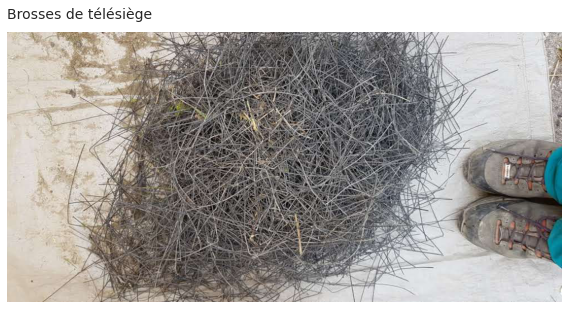

In [15]:
teamv = PILImage.open("resources/images/alpes_valaisanne/veysonnaz_brosse.jpg")

# display images
fig, ax = plt.subplots(figsize=(8,4.5))

axone=ax
sut.hide_spines_ticks_grids(axone)
axone.imshow(teamv);
axone.set_title("Brosses de télésiège", **ck.title_k14)

plt.tight_layout()
plt.show()

## Utility of the objects found

The utility type is based on the utilization of the object prior to it being discarded or item description if the original use is undetermined. Identified objects are classified into one of the predefined categories. The categories are grouped according to utilization or item description. 

*  **wastewater**: items released from water treatment plants includes items likely toilet flushed   
*  **micro plastics (< 5mm)**: fragmented plastics and pre-production plastic resins 
*  **infrastructure**: items related to construction and maintenance of buildings, roads and water/power supplies 
*  **food and drink**: all materials related to consuming food and drink
*  **agriculture**: primarily industrial sheeting i.e., mulch and row covers, greenhouses, soil fumigation, bale wraps. Includes hard plastics for agricultural fencing, flowerpots etc. 
*  **tobacco**: primarily cigarette filters, includes all smoking related material 
*  **recreation**: objects related to sports and leisure i.e., fishing, hunting, hiking etc.
*  **packaging non food and drink**: packaging material not identified as food, drink nor tobacco related 
*  **plastic fragments**: plastic pieces of undetermined origin or use 
*  **personal items**: accessories, hygiene and clothing related 

See the annex for the complete list of objects identified, includes descriptions and group classification. The section [Code groups](codegroups) describes each code group in detail and provides a comprehensive list of all objects in a group.

*__Below:__ Walking trails utility of objects found: % of total by water feature. Fragmented objects with no clear identification remain classified by size.*


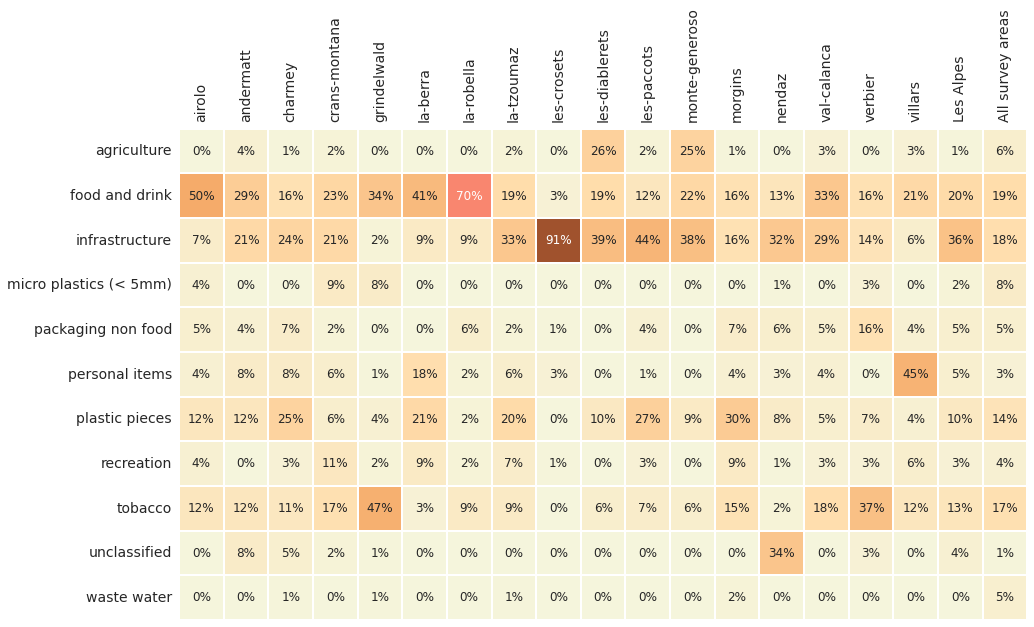

In [16]:
# the median survey total and % of total for codegroups
cg_t = wt_data.groupby(["loc_date", "location","groupname"], as_index=False).agg(agg_pcs_quantity)

# aggregate all that for each water feature
cg_t = cg_t.groupby(["location", "groupname"], as_index=False).agg({unit_label:"median", "quantity":"sum"})

# quantity per water feature
cg_tq = cg_t.groupby("location").quantity.sum()

# assign the water feature total to each record
for a_feature in cg_tq.index:
    cg_t.loc[cg_t.location == a_feature, "f_total"] = cg_tq.loc[a_feature]

# get the percent of total for each group for each water feature
cg_t["pt"] = (cg_t.quantity/cg_t.f_total).round(2)

# pivot that
data_table = cg_t.pivot(columns="location", index="groupname", values="pt")

# make a column for the survey area and all data
data_table[level_names[0]]= sut.aggregate_to_group_name(wt_data,name=level_names[0])
data_table[level_names[1]]= sut.aggregate_to_group_name(sd, name=level_names[1])

# chart that
fig, ax = plt.subplots(figsize=(len(data_table.columns)*.8,len(data_table)*.9))

axone = ax
sns.heatmap(data_table , ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, cbar=False, fmt=".0%", linewidth=.1, square=True, linecolor="white")

axone.set_xlabel("")
axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

In [17]:
# median p/50m solve cg_t for unit_label
data_table = cg_t.pivot(columns="location", index="groupname", values=unit_label)

# survey area median
data_table[level_names[0]] = sut.aggregate_to_group_name(fd, name=level_names[0], val="med")

# all survey area median
data_table[level_names[1]] = sut.aggregate_to_group_name(sd, unit_label=unit_label, name=level_names[1], val="med" )

*__Below:__ Walking trails utility of objects found: median p/100m.*

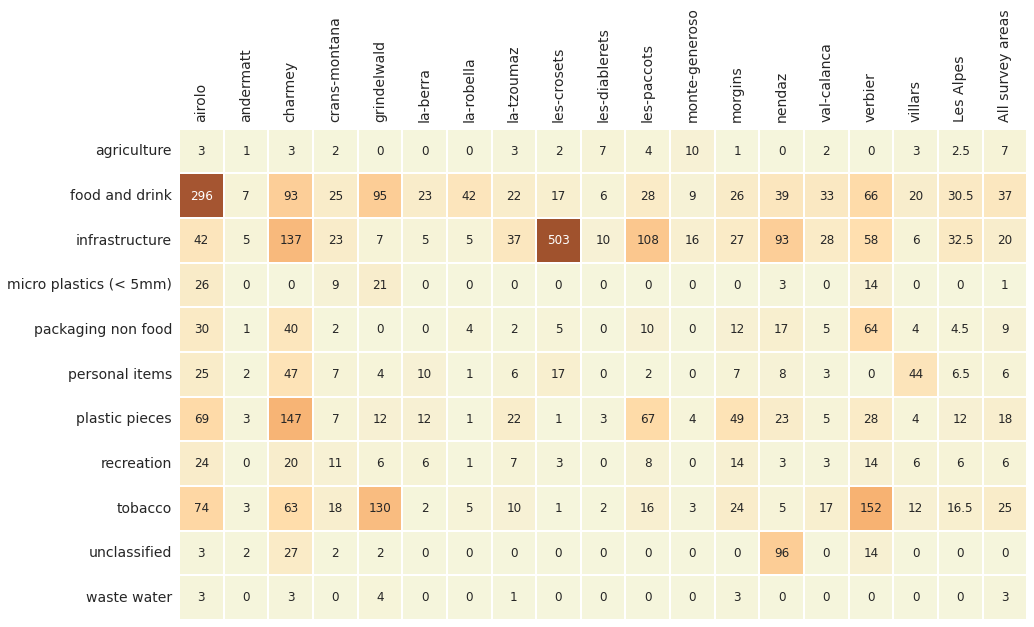

In [18]:
fig, ax = plt.subplots(figsize=(len(data_table.columns)*.8,len(data_table)*.9))

axone = ax
sns.heatmap(data_table , ax=axone, cmap=cmap2, vmax=300, annot=True, annot_kws={"fontsize":12}, fmt="g", cbar=False, linewidth=.1, square=True, linecolor="white")

axone.set_xlabel("")
axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

### Percentile ranking of survey results with respect to land use

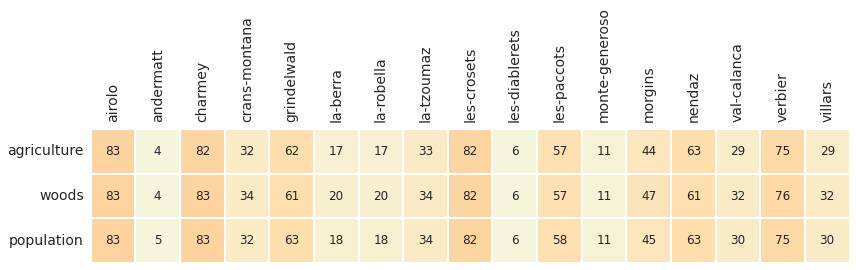

In [19]:
# get the percentile ranking under each condition:
# define land use ranges based on the sample data
l_f = ["% to agg", "% to woods", "population"]

this_range = (fd[l_f[0]].min(), fd[l_f[0]].max())
this_range_w = (fd[l_f[1]].min(), fd[l_f[1]].max())
this_range_p = (fd[l_f[2]].min(), fd[l_f[2]].max())

# apply them to all the data
# one test for agg -- a dominant land use feature of the sample data
some_data = a_data[(a_data[l_f[0]] >= this_range[0])&(a_data[l_f[0]] <= this_range[1])].copy()

# one test for woods -- the dominant land use feature of the sample data
some_data_w = a_data[(a_data[l_f[1]] >= this_range_w[0])&(a_data[l_f[1]] <= this_range_w[1])].copy()

# one test for population -- 
some_data_p = a_data[(a_data[l_f[2]] >= this_range_p[0])&(a_data[l_f[2]] <= this_range_p[1])].copy()

# remove Alps valaisannes
some_data = some_data[~some_data.location.isin(fd.location.unique())].copy()
some_data_w = some_data_w[~some_data_w.location.isin(fd.location.unique())].copy()
some_data_p = some_data_p[~some_data_p.location.isin(fd.location.unique())].copy()

# the number of samples and locations that have similar land use profiles as AV:
# agg to loc_date for each criteria
# data for charting and comparing
data=some_data.groupby(["loc_date","location",l_f[0]], as_index=False)[unit_label].sum()
data_w =some_data_w.groupby(["loc_date","location",l_f[1]], as_index=False)[unit_label].sum()
data_p = some_data_p.groupby(["loc_date","location",*l_f[1:]], as_index=False)[unit_label].sum()

# get the percentile ranking for each location under each condtion:
table_data = {}
for i,x in enumerate(nvsn):
    this_num = wt_dt.loc[wt_dt.location == x, unit_label].values[0]
    a = (stats.percentileofscore(data[unit_label].to_numpy(), this_num))
    b = (stats.percentileofscore(data_p[unit_label].to_numpy(), this_num))
    c = (stats.percentileofscore(data_w[unit_label].to_numpy(), this_num))
    table_data.update({x:{"agriculture":a, "woods":b, "population":c}})

# make df and format
t_data = pd.DataFrame(table_data)
t_data = t_data.astype("int")
t_data.reset_index(inplace=True)
t_data.rename(columns={"index":"variable"}, inplace=True)
t_data.set_index("variable", inplace=True, drop=True)

fig, ax = plt.subplots(figsize=(len(nvsn)*.8,5))

axone = ax
sns.heatmap(t_data , ax=axone, cmap=cmap2, vmax=300, annot=True, annot_kws={"fontsize":12}, fmt="g", cbar=False, linewidth=.1, square=True, linecolor="white")

axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

*__Above:__ The ranking of the alpes survey locations with respect to land use.  For example, the survey results at Airolo were greater than 83% of all the surveys (lakes, rivers and alpes). At Andermatt the survey results are lower than 95% of all surveys with a comparable land use profile.*

## Discussion

### Alps survey results compared to shoreline surveys

The median value is 110 p/100m for the 17 locations that met the length and width criteria in the Alps survey area, less than the median value of all the other survey areas (189p/100m). Objects related to consumption such as food, drink and tobacco were a smaller percent of the total and had a lower p/100m rate compared to locations along water systems. This difference could be in part due to the low levels of urbanization that characterizes the Alps survey area with respect to all other survey areas.

Objects related to infrastructure are 36% of the total or twice the rate encountered when all the survey areas are considered. This is largely attributed to ski-lift brush filaments identified in substantial quantities at Les-Crosets. Ski lift brushes are used to remove the snow from the top of covered ski-lift-chairs as they approach the embarkation site. Similar to industrial pellets or expanded foam beads in the aquatic environment, ski brush pieces will likely be a recurring item to be identified in occasionally large quantities at very specific sites.

The ratio of infrastructure objects to food and tobacco objects is almost 1, results like these are typical of environments that have a more developed infrastructure, see [Shared Responsibility](transport). Fragmented plastics are found at rates similar to the other survey areas. Cable ties and masking tape are new additions to the most common list, both objects are found on the shoreline but at rates below 50%. 

Recall that these surveys were conducted along the ski-lift line or a walking trail on the domain of a ski-area.  While use may be greater in winter, many domains are excellent vtt and hiking areas, establishing a use case year-round for these regions. 

#### Most common objects

The most common objects are 74% of the total identified. Cigarette ends did not exceed the national median in the Alpes survey area, however there were significant values recorded at Verbier, Grindelwald and Airolo. Specific items from the infrastructure group are represented such as: 

1. screws and bolts
2. cable ties
3. masking tape
4. bricks and pipes

However, the absence of expanded or extruded polystyrene from the Alps survey areas most common list is a sharp contrast to all other survey areas where this product alone is approximately 13% of the total, see [_Lakes and rivers_](allsurveys).

### Implementing litter surveys in the existing business model

A clean-up event covers a relatively large geographic area compared to a beach-litter survey. Volunteers to these events are drawn by the opportunity to take care of the environment AND enjoy some moderate exercise in the company of others. Beach-litter surveys do not offer the same type of activity level and may not be of interest to all volunteers. 

Implementing beach litter surveys means offering the experience to volunteers at the event but maintaining the resources internally to ensure that the survey is completed according to protocol. This includes identifying, counting and entering data. Summit foundation was able to do this by ensuring that there was one person present at each event that could complete the survey. 

The surveyors from summit foundation preferred to sample along the lift lines and starting at the arrival and departure of ski lifts. Samples taken this way follow the flow of the event: downhill and within the areas of high traffic. 

Samples that were taken around buildings or other installations produced higher survey results. Confirming what Summit foundation members had identified in previous years. From these experiences the Project manager, Téo Gursoy, explained: 

> Indeed, the surveyors concentrate mainly on the sections under the chairlifts, gondolas or at the departure and arrival of these installations which are highly frequented places. 

In some instances, the density of the objects is so great that the surveyor felt compelled to concentrate on one area by expanding the width of the survey area. M Gursoy described what happened when a surveyor happened on a location that had large quantities of ski-lift brushes: 

> However, the surveyor started the trail section at the arrival station of the gondola. The ski-lift brushes quickly caught the surveyor"s attention who decided to focus on this area alone in order to find out how many of them could be found in this type of area… 

The survey results around infrastructure or buildings are not indicative of the state of the environment throughout the domain. Surveys around these structures tend to have higher counts, however they make up only a small portion of the total land use.

Adjustments had to be made to the software and reporting scheme in order to handle the different types of data that are produced from clean-up events. That included creating new identification codes for specific objects that are found in the Alps survey area. Furthermore, Summit foundation provided the resources so that one foundation staff member could be trained using the project protocol and software.

### Conclusions

The surveys conducted along the trails and lift lines in the Alps survey area produced data that was very similar to the data produced from surveys done on the shoreline. However, when surveyors focused their attention around specific infrastructure items the survey counts return extreme values. Survey results on the shoreline would produce the same results if surveys were only conducted at locations where high litter counts were more probable. 

Food and drink objects are only 11% of the total objects found compared to 36% from the other survey areas. However, infrastructure objects are 75% of the total in the Alps versus 18% at all other survey areas. This is in part due to the difference in human presence when compared to locations at lower altitudes where human presence is a constant throughout the year, thus more of a pressure from food and tobacco objects as opposed to infrastructure. 

This first project also demonstrated the feasibility of combining monitoring with popular events. In preparation to monitoring, the members of both teams exchanged ideas and sorted samples together. This permitted both organizations to better understand each other and determine baseline services that could be provided while collecting data for a national report: 

1. Assist in the collection and identification
2. Assist in the data entry
3. Provide charts, graphs and data that can be used by the participating organizations

A beach-litter survey requires 2-4 hours to complete, depending on how many different objects there are. This resource was not accounted for in the operating budget of either organization. Therefore, Summit foundation provided the coordination and infrastructure and hammerdirt provided an additional surveyor and IT support. 

The data provided allows for direct comparisons between locations, provided that the same survey method is used. The abundance of infrastructure items relative to food and tobacco items is indicative of surveys completed in rural locations. How well this data compares to surveys done on the shoreline needs to be explored further. However, cigarette ends, broken glass, fragmented plastics and snack wrappers are among the most common items found on the shoreline. 

We thank all the members of Summit Foundation for their help and specifically Olivier Kressmann and Téo Gursoy. 

## Annex

### Fragmented foams and plastics by size group

The table below contains the components of Gfoam and Gfrags. Objects labeled “Expanded foams” are grouped as Gfoam the rest are grouped as Gfrags for analysis. 

*__Below:__ fragmented foams and plastics by size group. Median {unit_label}, number of pieces, percent of total.*

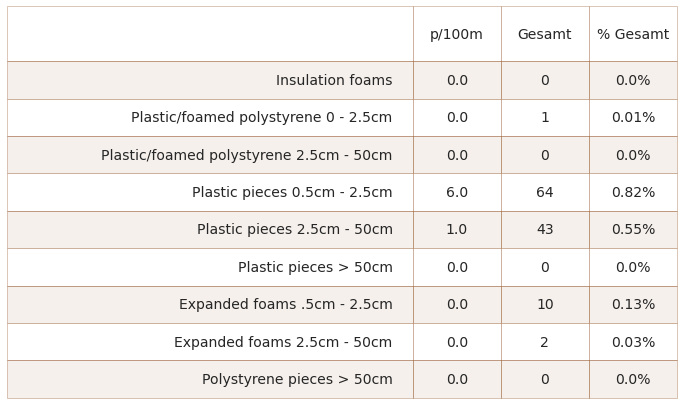

In [20]:
## collect the data before aggregating foams for all locations in the survye area
h=pd.read_csv("resources/checked_alpes_survey_data_be.csv")

# remove prefix
h["location"] = h["location"].map(lambda x: sut.get_rid_of_ix(x, prefix="clean-up-tour-"))

# remove prefixes from survey data
lAlps = h[h.river_bassin == bassin_name][["loc_date","code","location","river_bassin","groupname", "quantity", "pcs_m"]].copy()

# convert to reporting unit
lAlps[unit_label]= (lAlps.pcs_m*100).round(2)

# the fragmented plastics and foams
some_foams = ["G81", "G82", "G83", "G74"]
some_frag_plas = list(lAlps[lAlps.groupname == "plastic pieces"].code.unique())

# get just the foams and plastics and aggregate to code
conditions = ((lAlps.code.isin([*some_frag_plas, *some_foams]))&(~lAlps.location.isin(remove)))
fd_frags_foams = lAlps[conditions].groupby(["loc_date","code"], as_index=False).agg(agg_pcs_quantity)
fd_frags_foams = fd_frags_foams.groupby("code", as_index=False).agg(agg_pcs_median)

# add code description and format for printing
fd_frags_foams["item"] = fd_frags_foams.code.map(lambda x: code_description_map.loc[x])
fd_frags_foams["% of total"] = (fd_frags_foams.quantity/fd.quantity.sum()*100).round(2)
fd_frags_foams["% of total"] = fd_frags_foams["% of total"].map(lambda x: F"{x}%")
fd_frags_foams["quantity"] = fd_frags_foams["quantity"].map(lambda x: F"{x:,}")

# table data
data = fd_frags_foams[["item",unit_label, "quantity", "% of total"]].copy()
data.rename(columns={"quantity":"Gesamt", "% of total":"% Gesamt"}, inplace=True)

fig, axs = plt.subplots(figsize=(12,len(data)*.8))
sut.hide_spines_ticks_grids(axs)

this_table = sut.make_a_table(axs, data.values,  colLabels=data.columns, colWidths=[.6, .13, .13, .13], bbox=[0, 0, 1, 1])
this_table.get_celld()[(0,0)].get_text().set_text(" ")
this_table.set_fontsize(14)

plt.show()
plt.tight_layout()
plt.close()

### Land use profile of survey locations

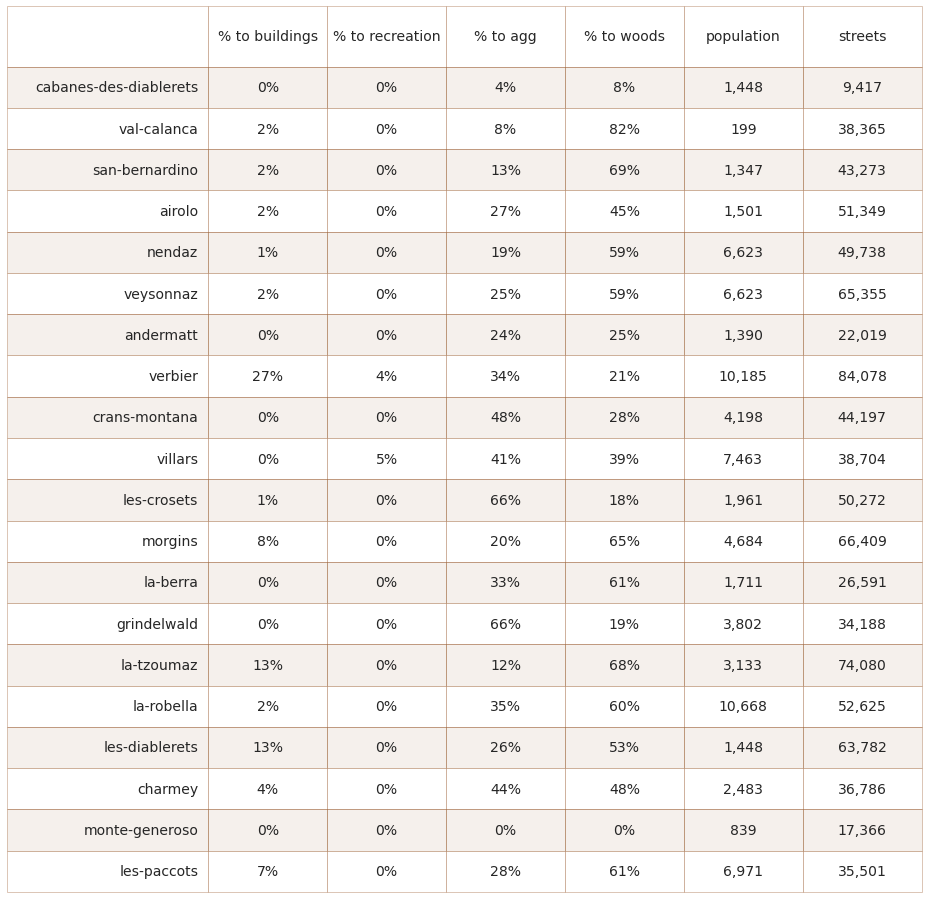

In [21]:
# get the land use profile of AV
lu_prof = fd[["location","% to buildings", "% to recreation", "% to agg", "% to woods","population","streets"]].drop_duplicates()

# format for printing
lu_prof.loc[:,lu_prof.columns[1:-2]] = lu_prof.loc[:,lu_prof.columns[1:-2]].applymap(lambda x: F"{int((x*100))}%")
lu_prof.loc[:, lu_prof.columns[5:]] = lu_prof.loc[:, lu_prof.columns[5:]].applymap(lambda x: F"{int(x):,}")

# put that to a table
data=lu_prof.copy()

fig, axs = plt.subplots(figsize=(13,len(table_one)*.6))
sut.hide_spines_ticks_grids(axs)

this_table = sut.make_a_table(axs, data.values,  colLabels=data.columns, colWidths=[.22, *[.13]*6], bbox=[0, 0, 1, 1])
this_table.get_celld()[(0,0)].get_text().set_text(" ")
this_table.set_fontsize(14)

plt.tight_layout()
plt.show()

### Les Alps with respect to land use

The results from AV are compared to the other survey results that have either _% to woods_ or _% to agg_ within the same range as AV. The ranges for AV are:

* \% to agg: 0 to 66\%
* \% to woods: 0 to 83\%
* population: 199 to 10,668

In [22]:
# define land use ranges based on the sample data
this_range = (fd[l_f[0]].min(), fd[l_f[0]].max())
this_range_w = (fd[l_f[1]].min(), fd[l_f[1]].max())
this_range_p = (fd[l_f[2]].min(), fd[l_f[2]].max())

# apply them to all the data
# one test for agg -- a dominant land use feature of the sample data
some_data = a_data[(a_data[l_f[0]] >= this_range[0])&(a_data[l_f[0]] <= this_range[1])].copy()

# one test for woods -- the dominant land use feature of the sample data
some_data_w = a_data[(a_data[l_f[1]] >= this_range_w[0])&(a_data[l_f[1]] <= this_range_w[1])].copy()

# one test for population -- 
some_data_p = a_data[(a_data[l_f[2]] >= this_range_p[0])&(a_data[l_f[2]] <= this_range_p[1])].copy()

# remove Alps valaisannes
some_data = some_data[~some_data.location.isin(fd.location.unique())].copy()
some_data_w = some_data_w[~some_data_w.location.isin(fd.location.unique())].copy()
some_data_p = some_data_p[~some_data_p.location.isin(fd.location.unique())].copy()

# the number of samples and locations that have similar land use profiles as AV:
# agg to loc_date for each criteria
# data for charting and comparing
data=some_data.groupby(["loc_date","location",l_f[0]], as_index=False)[unit_label].sum()
data_w =some_data_w.groupby(["loc_date","location", l_f[1]], as_index=False)[unit_label].sum()
data_p = some_data_p.groupby(["loc_date","location",l_f[1], "population"], as_index=False)[unit_label].sum()
regional = fd.groupby(["loc_date","location", *l_f], as_index=False)[unit_label].sum()

# locations that share the characteristics
commonsamps = set(data.loc_date.unique()) & set(data_w.loc_date.unique())& set(data_p.loc_date.unique())
commonlocs = set(data.location.unique()) & set(data_w.location.unique())&set(data_p.location.unique())

# print these out to get the comparison

# print("agg")
# print(this_range)
# print(len(data.location.unique()))
# print(data.loc_date.nunique())
# print("woods")
# print(this_range_w)
# print(len(data_w.location.unique()))
# print(data_w.loc_date.nunique())
# print("p")
# print(this_range_p)
# print(len(data_p.location.unique()))
# print(data_p.loc_date.nunique())
# print(len(commonsamps))
# print(commonlocs)

# make a categorical df for mapping
mat_agg = dfBeaches.loc[data.location.unique()]
mat_agg["match"] = "agg"
mat_w = dfBeaches.loc[data_w.location.unique()]
mat_w["match"] = "woods"
mat_p = dfBeaches.loc[data_p.location.unique()]
mat_p["match"]="pop"

# merge all that and export to .csv
landusemap = pd.concat([mat_agg, mat_w, mat_p], axis=0)
# landusemap.to_csv("output/Alps-valaisannes/lu_comparison.csv", index=False)

*__Top left:__ survey total with respect to % to agg, range=(0%, 66%). __Top right:__ survey total with respect to % to woods, range=(0%, 65%). __Bottom left:__ survey total with respect to population, range=(199, 10,668)*

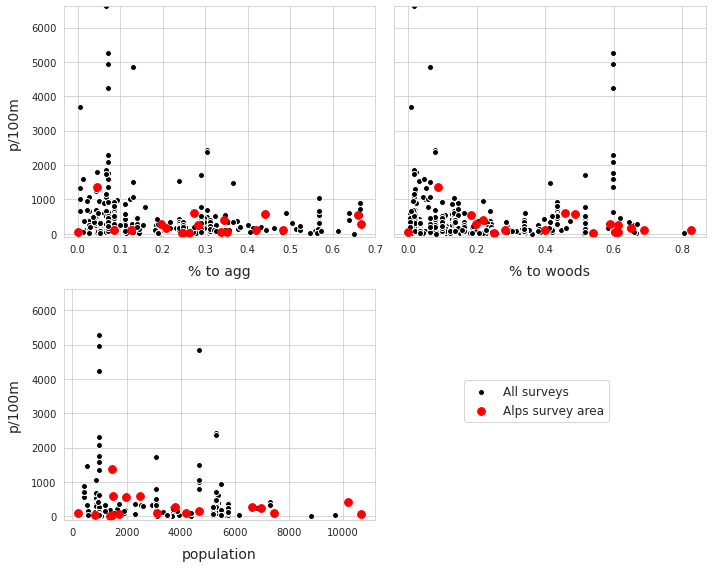

In [23]:
fig, axs = plt.subplots(2,2, figsize=(10,8), sharey=True)

axone=axs[0,0]
axtwo=axs[0,1]
axthree=axs[1,0]
axfour=axs[1,1]

# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data, x="% to agg", y=unit_label, color="black", alpha=1, linewidth=1, label="All surveys", ax=axone, zorder=1)

# point estimates of the percentile ranking based off the edcf of all surveys
# place to store the rankings
rankings = {}

# plot the values for AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["% to agg"]
    axone.scatter(this_x, this_y, color="red", s=60, zorder=2)

# handle extreme values
axone.set_ylim(0, max(data[unit_label].to_numpy()))

# set labels
axone.set_ylabel(unit_label, **ck.xlab_k14)
axone.set_xlabel("% to agg", **ck.xlab_k14)

# gather up legend handles
axone.get_legend().remove()

# start axtwo
# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data_w, x="% to woods", y=unit_label, color="black", alpha=1, linewidth=1, label="All surveys", ax=axtwo, zorder=1)

# plot the values from AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["% to woods"]
    rankings.update({x:(this_x, this_y)})
    axtwo.scatter(this_x, this_y, color="red", s=60, zorder=2)

# handle extreme values
axtwo.set_ylim(0, max(data[unit_label].to_numpy()))

# set labels
axtwo.set_ylabel(unit_label, **ck.xlab_k14)
axtwo.set_xlabel("% to woods", **ck.xlab_k14)
axtwo.get_legend().remove()

# start axthree
# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data_p, x="population", y=unit_label, color="black", alpha=1, linewidth=1, label="All surveys", ax=axthree, zorder=1)

# plot the values from AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["population"]
    rankings.update({x:(this_x, this_y)})
    axthree.scatter(this_x, this_y, color="red", s=60, label="Alps survey area", zorder=2)

# handle extreme values
axthree.set_ylim(-100, max(data[unit_label].to_numpy()))

# start axfour,# clear axfour
sut.hide_spines_ticks_grids(axfour)

# set labels
axthree.set_ylabel(unit_label, **ck.xlab_k14)
axthree.set_xlabel("population", **ck.xlab_k14)
handles, labels = axthree.get_legend_handles_labels()
axthree.get_legend().remove()

fig.legend(handles[:2], labels[:2], bbox_to_anchor=(.75,.25), loc="lower center",  fontsize=12)
plt.tight_layout()
plt.show()

### Organisation and execution

Summit foundation: Téo Gürsoy

Hammerdirt: Bettina Siegenthaler

### Survey locations

In [24]:
# display the survey locations
pd.set_option("display.max_rows", None)
disp_columns = ["latitude", "longitude", "city", "population", "streets", "% to buildings"]
disp_beaches = dfBeaches.loc[t["locations"]][disp_columns]
disp_beaches

,latitude,longitude,city,population,streets,% to buildings
slug,,,,,,
cabanes-des-diablerets,46.338604,7.215525,Ormont-Dessus,1448.0,9417.0,0.000000
val-calanca,46.330718,9.120103,Calanca,199.0,38365.0,0.021708
san-bernardino,46.445947,9.191344,Mesocco,1347.0,43273.0,0.022523
airolo,46.514257,8.607884,Airolo,1501.0,51349.0,0.027221
nendaz,46.162099,7.283486,Nendaz,6623.0,49738.0,0.019886
veysonnaz,46.180334,7.366005,Nendaz,6623.0,65355.0,0.024148
andermatt,46.618327,8.598803,Andermatt,1390.0,22019.0,0.000000
verbier,46.103981,7.224760,Val de Bagnes,10185.0,84078.0,0.271693
crans-montana,46.334214,7.479386,Lens,4198.0,44197.0,0.008439


### Inventory of all items

In [25]:
pd.set_option("display.max_rows", None)
# code totals for the river bassin
fd_code_t= fd.groupby(["code", "groupname"], as_index=False).agg({"quantity":"sum", "fail":"sum", unit_label:"median"})
fd_code_t.rename(columns={"groupname":"utility"}, inplace=True)
fd_code_t["% of total"] = fd_code_t.quantity/fd_code_t.quantity.sum()
fd_code_t.set_index("code", inplace=True)
fd_code_t.sort_values(by="quantity", ascending=False, inplace=True)
fd_code_t["material"] = fd_code_t.index.map(lambda x: code_material_map[x])
fd_code_t["item"] = fd_code_t.index.map(lambda x: code_description_map.loc[x])
fd_code_t["% of total"] = (fd_code_t["% of total"]*100).round(1)
fd_code_t["fail rate"] = ((fd_code_t["fail"]/len(fd.loc_date.unique()))*100).round(1)
complete_inventory = fd_code_t[fd_code_t.quantity>0][["item", "quantity", "utility",  "% of total","fail rate"]]
complete_inventory

,item,quantity,utility,% of total,fail rate
code,,,,,
G704,Brosse de télésiège,5181,infrastructure,66.6,10.0
G27,Cigarette filters,317,tobacco,4.1,95.0
Gfrags,Fragmented plastics,294,plastic pieces,3.8,50.0
G30,"Food wrappers; candy, snacks",253,food and drink,3.3,95.0
G705,Screws and bolts,206,infrastructure,2.6,65.0
G936,Sheeting ag. greenhouse film,132,agriculture,1.7,15.0
Gfoam,Expanded polystyrene,121,infrastructure,1.6,0.0
G93,"Cable ties; steggel, zip, zap straps",104,infrastructure,1.3,60.0
G200,"Glass drink bottles, pieces",84,food and drink,1.1,45.0
